# Final Project: Problem Set 2

In [4]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Taking out column names

In [5]:
data_path = "./bank-data/bank-full.csv"
data = pd.read_csv(data_path, delimiter=';', quotechar='"', header=None)

columns = data.iloc[0].str.strip('"')
data.columns = columns

data = data[1:]
data = data.apply(lambda x: x.str.strip('"'))

new_path = "./bank-data/new-data.csv"
data.to_csv(new_path, index=True, index_label='Index')

Checking the columns of each dataset

In [6]:
bank_data = pd.read_csv(new_path)
bank_data.columns
bank_data.head()

,Index,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,2,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,3,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no
3,4,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no
4,5,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no


Hence, 'Subscribed' is the target variable.

Checking the data types of the variables

In [7]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      45211 non-null  int64  
 1   age        32767 non-null  float64
 2   job        45211 non-null  object 
 3   marital    45211 non-null  object 
 4   education  45211 non-null  object 
 5   default    45211 non-null  object 
 6   balance    32767 non-null  float64
 7   housing    45211 non-null  object 
 8   loan       45211 non-null  object 
 9   contact    45211 non-null  object 
 10  day        32767 non-null  float64
 11  month      45211 non-null  object 
 12  duration   32767 non-null  float64
 13  campaign   32767 non-null  float64
 14  pdays      32767 non-null  float64
 15  previous   32767 non-null  float64
 16  poutcome   45211 non-null  object 
 17  y          45211 non-null  object 
dtypes: float64(7), int64(1), object(10)
memory usage: 6.2+ MB


Checking the shapes of each dataset

In [8]:
bank_data.shape

(45211, 18)

## Data Exploration

In [9]:
#Printing the first 5 rows of the test dataset
bank_data.head()

,Index,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,2,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,3,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no
3,4,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no
4,5,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no


In [10]:
#checking for missing values in train dataset
bank_data.isnull().sum()

Index            0
age          12444
job              0
marital          0
education        0
default          0
balance      12444
housing          0
loan             0
contact          0
day          12444
month            0
duration     12444
campaign     12444
pdays        12444
previous     12444
poutcome         0
y                0
dtype: int64

### Univariate Analysis

#### Analysis of 'Subscribed' variable

In [11]:
#Frequency of 'subscribed'
bank_data['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

<Axes: xlabel='y', ylabel='count'>

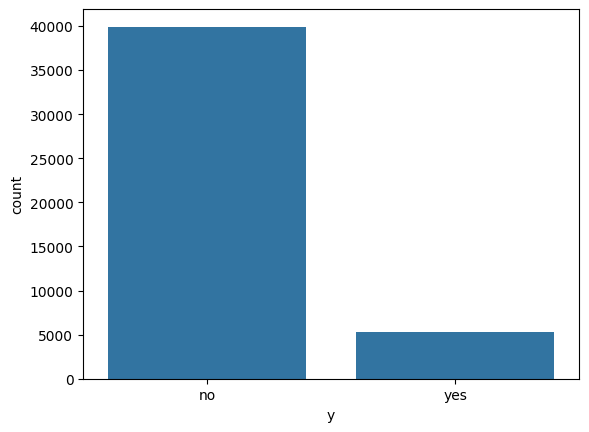

In [12]:
# Plotting the 'subscribed' frequency
sns.countplot(data=bank_data, x='y')

In [13]:
#Normalizing the frequency table of 'Subscribed' variable
bank_data['y'].value_counts(normalize=True)

y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64

From the above analysis we can see that only 5,289 people out of 45211 have subscribed which is roughly 12%.

#### Analysing th 'Job' variable

In [14]:
#Frequency table
bank_data['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

<Axes: xlabel='job'>

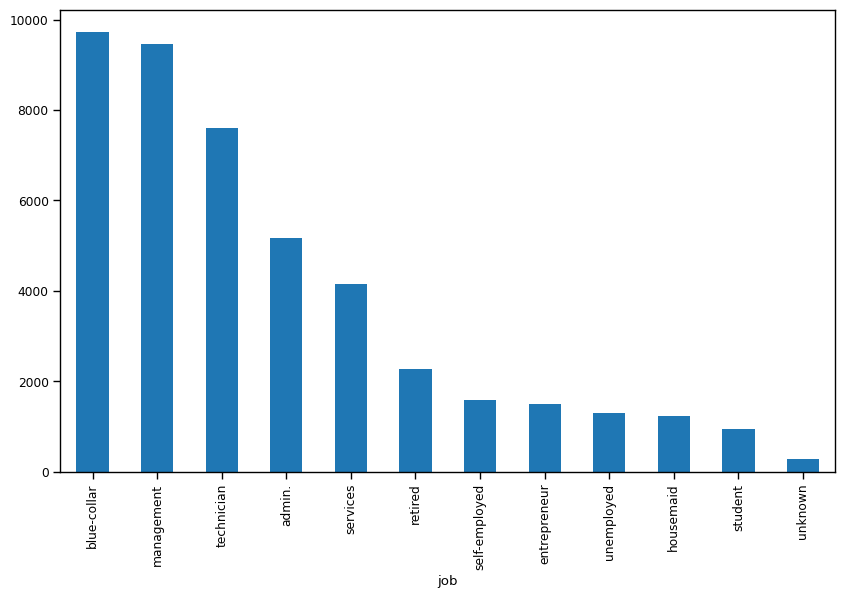

In [15]:
# Plotting the job frequency table
sns.set_context('paper')
bank_data['job'].value_counts().plot(kind='bar', figsize=(10,6))

We can see that most of the clients beloned to blue-collar job and students are least in general as they don't make term deposits in general.

#### Analysis of 'marital' status

In [16]:
bank_data['marital'].value_counts()

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

<Axes: xlabel='marital', ylabel='count'>

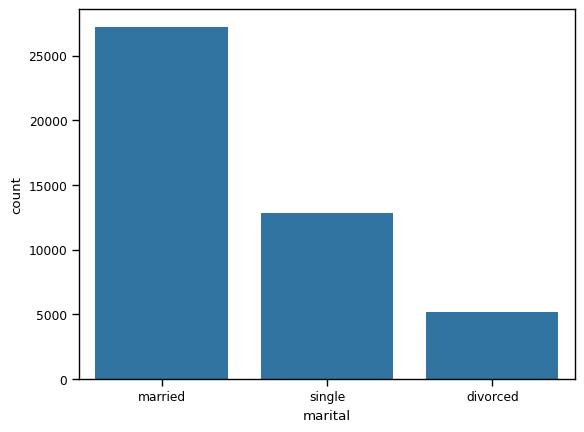

In [17]:
sns.countplot(data=bank_data, x='marital')

<Axes: xlabel='marital', ylabel='count'>

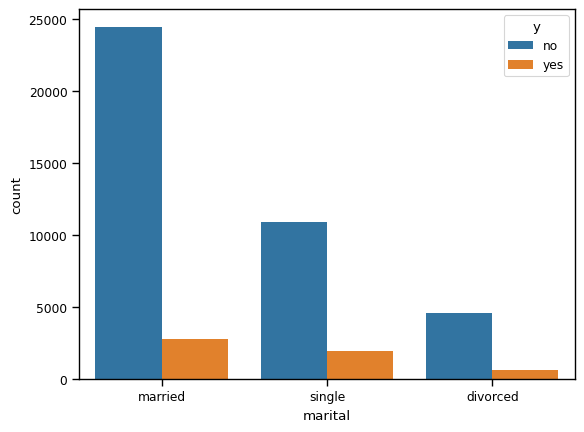

In [18]:
sns.countplot(data=bank_data, x='marital', hue='y')

### Analyzing the 'age' variable

<Axes: xlabel='age', ylabel='Density'>

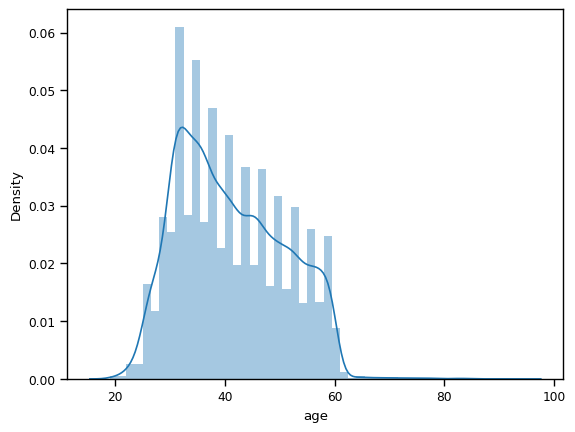

In [19]:
sns.distplot(bank_data['age'])

We can infer that most of the clients fall in the age group between 20-60.

## Bivariate Analysis

In [20]:
#job vs subscribed
pd.crosstab(bank_data['job'],bank_data['y'])

y,no,yes
job,,
admin.,4540,631
blue-collar,9024,708
entrepreneur,1364,123
housemaid,1131,109
management,8157,1301
retired,1748,516
self-employed,1392,187
services,3785,369
student,669,269


In [21]:
job = pd.crosstab(bank_data['job'],bank_data['y'])
job_norm = job.div(job.sum(1).astype(float), axis=0)

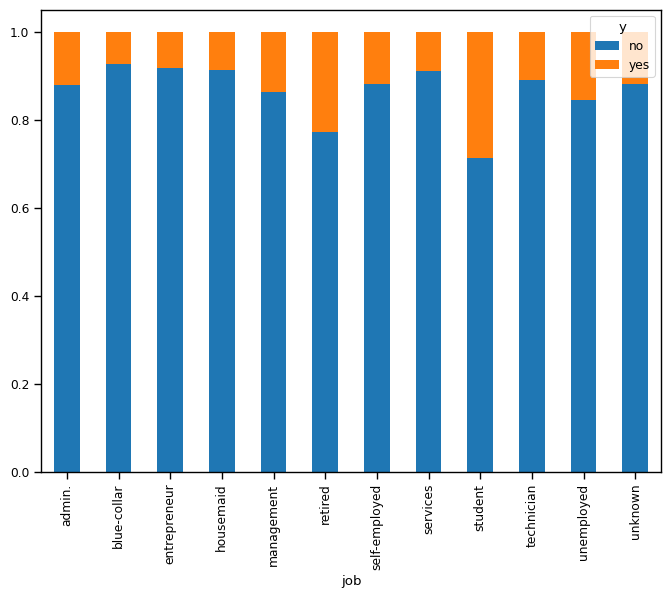

In [22]:
job_norm.plot.bar(stacked=True,figsize=(8,6));

From the above graph we can infer that students and retired people have higher chances of subscribing to a term deposit, which is surprising as students generally do not subscribe to a term deposit. The possible reason is that the number of students in the dataset is less and comparatively to other job types, more students have subscribed to a term deposit.

In [23]:
#Marital status vs subscribed
pd.crosstab(bank_data['marital'], bank_data['y'])

y,no,yes
marital,,
divorced,4585,622
married,24459,2755
single,10878,1912


In [24]:
marital = pd.crosstab(bank_data['marital'], bank_data['y'])
marital_norm = marital.div(marital.sum(1).astype(float), axis=0)
marital_norm

y,no,yes
marital,,
divorced,0.880545,0.119455
married,0.898765,0.101235
single,0.850508,0.149492


<Axes: xlabel='marital'>

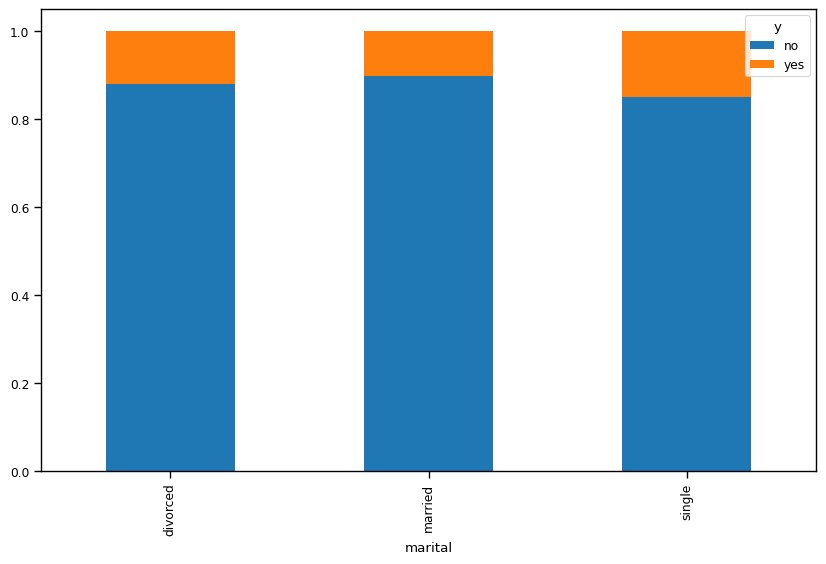

In [25]:
marital_norm.plot.bar(stacked=True, figsize=(10,6))

From the above analysis we can infer that marital status doesn't have a major impact on the subscription to term deposits.

In [26]:
#default vs subscription
pd.crosstab(bank_data['default'], bank_data['y'])

y,no,yes
default,,
no,39159,5237
yes,763,52


In [27]:
dflt = pd.crosstab(bank_data['default'], bank_data['y'])
dflt_norm = dflt.div(dflt.sum(1).astype(float), axis=0)
dflt_norm

y,no,yes
default,,
no,0.882039,0.117961
yes,0.936196,0.063804


<Axes: xlabel='default'>

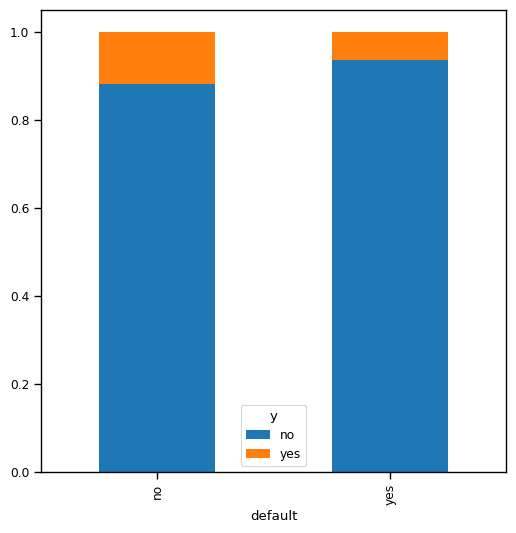

In [28]:
dflt_norm.plot.bar(stacked=True, figsize=(6,6))

We can infer that clients having no previous default have slightly higher chances of subscribing to a term loan as compared to the clients who have previous default history.

In [29]:
# Converting the target variables into 0s and 1s
bank_data['y'].replace('no', 0,inplace=True)
bank_data['y'].replace('yes', 1,inplace=True)

In [ ]:
bank_data['y']

In [30]:
#Correlation matrix
bc = bank_data.corr(numeric_only = True)
bc

,Index,age,balance,day,duration,campaign,pdays,previous,y
Index,1.000000,0.029902,0.076385,0.074001,-0.013024,0.005416,0.358137,0.156575,0.296287
age,0.029902,1.000000,0.084542,-0.023988,-0.041935,0.002819,-0.019675,-0.004110,-0.016919
balance,0.076385,0.084542,1.000000,0.001929,0.013459,-0.010174,0.005281,0.002726,0.026218
day,0.074001,-0.023988,0.001929,1.000000,-0.037317,0.171642,-0.056329,-0.021063,-0.025521
duration,-0.013024,-0.041935,0.013459,-0.037317,1.000000,-0.085131,-0.008615,-0.006352,0.471770
campaign,0.005416,0.002819,-0.010174,0.171642,-0.085131,1.000000,-0.079888,-0.024286,-0.026187
pdays,0.358137,-0.019675,0.005281,-0.056329,-0.008615,-0.079888,1.000000,0.380970,-0.009894
previous,0.156575,-0.004110,0.002726,-0.021063,-0.006352,-0.024286,0.380970,1.000000,-0.004507
y,0.296287,-0.016919,0.026218,-0.025521,0.471770,-0.026187,-0.009894,-0.004507,1.000000


<Axes: >

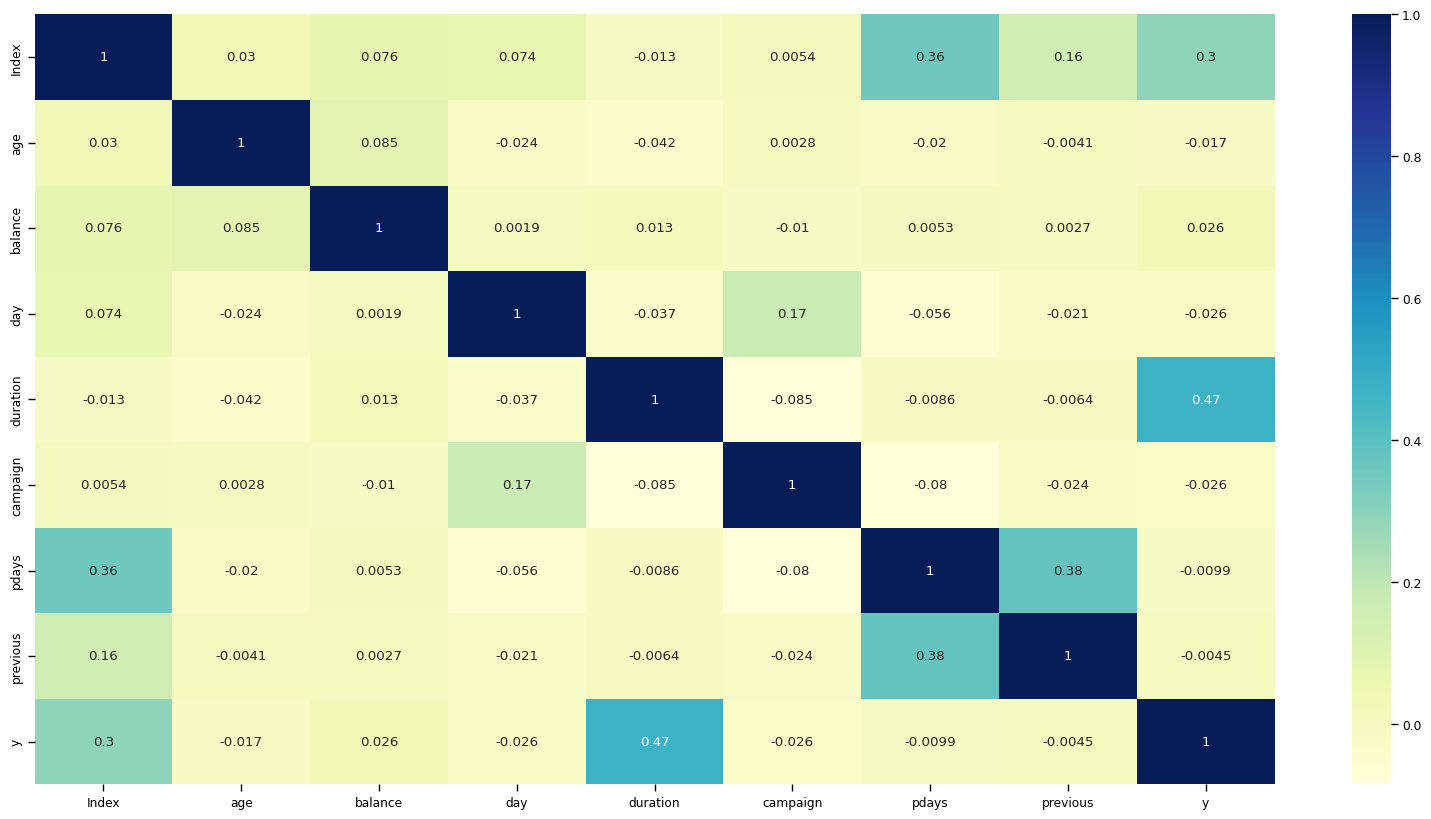

In [31]:
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(bc, annot=True, cmap='YlGnBu')

We can infer that duration of the call is highly correlated with the target variable. As the duration of the call is more, there are higher chances that the client is showing interest in the term deposit and hence there are higher chances that the client will subscribe to term deposit.

## Model Building

In [32]:
target = bank_data['y']
bank_data = bank_data.drop('y', axis=1)
target

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [33]:
#generating dummy values on the train dataset
bank_data = pd.get_dummies(bank_data)
bank_data.head()

,Index,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1,58.0,2143.0,5.0,261.0,1.0,-1.0,0.0,False,False,...,False,False,True,False,False,False,False,False,False,True
1,2,44.0,29.0,5.0,151.0,1.0,-1.0,0.0,False,False,...,False,False,True,False,False,False,False,False,False,True
2,3,33.0,2.0,5.0,76.0,1.0,-1.0,0.0,False,False,...,False,False,True,False,False,False,False,False,False,True
3,4,47.0,1506.0,5.0,92.0,1.0,-1.0,0.0,False,True,...,False,False,True,False,False,False,False,False,False,True
4,5,33.0,1.0,5.0,198.0,1.0,-1.0,0.0,False,False,...,False,False,True,False,False,False,False,False,False,True


In [34]:
bank_data.replace('Ture', 1,inplace=True)
bank_data.replace('False', 0,inplace=True)

Splitting the data into train and validation set such as to validate the results of our model on the validation set.
keeping 20% of the dataset as our validation set and the rest as our training set.

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_val, y_train, y_val = train_test_split(bank_data, target, test_size=0.2, random_state=12)

In [37]:
nan_columns = X_train.columns[X_train.isna().any()].tolist()
print("Columns with NaN values:", nan_columns)

Columns with NaN values: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


# Handling NaN values

In [38]:
from sklearn.impute import SimpleImputer

# Create an imputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the training data
X_train_imputed = imputer.fit_transform(X_train)

# Replace X_train with the imputed data
X_train = pd.DataFrame(X_train_imputed, columns=X_train.columns)


In [39]:
# Use the same imputer to transform the validation set
X_val_imputed = imputer.transform(X_val)

# Replace X_val with the imputed data
X_val = pd.DataFrame(X_val_imputed, columns=X_val.columns)


Now our data is ready and it's time to build our model and check its performance. Since it's a classification problem, I'll be using Logistic Regression model for this problem.

## Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
#creating an object of logistic regression model
lreg = LogisticRegression()

In [42]:
#fitting the data into the model
lreg.fit(X_train,y_train)

LogisticRegression()

In [43]:
#Making predictions on the validation set
pred = lreg.predict(X_val)

Checking the accuracy of our model

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
#Calculating the accuracy score
accuracy_score(y_val,pred)

0.8816764348114564

We got an accuracy score of around 88.81% on the validation dataset. Logistic regression has a linear decision boundary. What if our data have non linearity? We need a model that can capture this non linearity.

Using Decision Tree algorithm to for dealing with non-linearity

## Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
#creating an object of Decision tree
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

In [48]:
#fitting the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [49]:
#making predictions on the validation set
predict = clf.predict(X_val)
predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
#Calculating the accuracy
accuracy_score(y_val,predict)

We got an accuracy of 89% on the validation set. 

Finally, we will save these predictions into a csv file. 

In [50]:
submissions = pd.DataFrame()

In [51]:
pred = clf.predict(bank_data)

submissions['ID'] = bank_data['Index']
submissions['subscribed'] = pred

In [52]:
submissions['subscribed']

0        0
1        0
2        0
3        0
4        0
        ..
45206    0
45207    0
45208    1
45209    0
45210    0
Name: subscribed, Length: 45211, dtype: int64

Since the target variable is yes or no, we will convert 1 and 0 in the predictions to yes and no respectively.

In [53]:
submissions['subscribed'].replace(0,'no',inplace=True)
submissions['subscribed'].replace(1,'yes',inplace=True)

In [54]:
submissions['subscribed']

0         no
1         no
2         no
3         no
4         no
        ... 
45206     no
45207     no
45208    yes
45209     no
45210     no
Name: subscribed, Length: 45211, dtype: object

In [ ]:
submissions.to_csv('submission-file.csv', header=True, index=False)